# 1. Regresi Linear

mse :  527.4032278630916


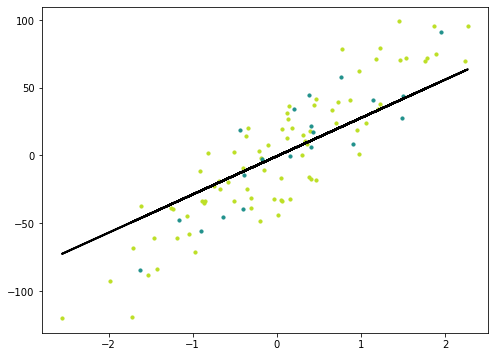

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
import numpy as np
from numpy.random import randn
import random
import matplotlib.pyplot as plt
from IPython.core.display import display, Image
from string import Template
import warnings

class LinearRegression:
    
    def __init__(self, learning_rate = 0.001, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X,y):
        n_samples, n_features = X.shape
        
        #init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            #compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            #update parameters
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
      
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression(learning_rate = 0.01, n_iters = 100)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
y_pred_line = regressor.predict(X)

mse = mean_squared_error(y_test, predictions)
print("mse : ", mse)

cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8,6))
plot1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10) 
plot2 = plt.scatter(X_test, y_test, color = cmap(0.5), s = 10) 
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label = "prediction")    
plt.show()        

# 2 . Logistisc Regression

In [21]:
class logisticRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        #init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum((y_predicted - y))
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return (1 / (1 + np.exp(-x)))

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 24)
lr = logisticRegression(lr = 0.001, n_iters = 1000)
lr.fit(X_train, y_train)

prediksi = lr.predict(X_test)
print("akurasi: ", accuracy(y_test, prediksi))       

akurasi:  0.9298245614035088


<ipython-input-21-8b69adef1f75>:34: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x)))


# 3. K - Means

3
3481.4959066512015


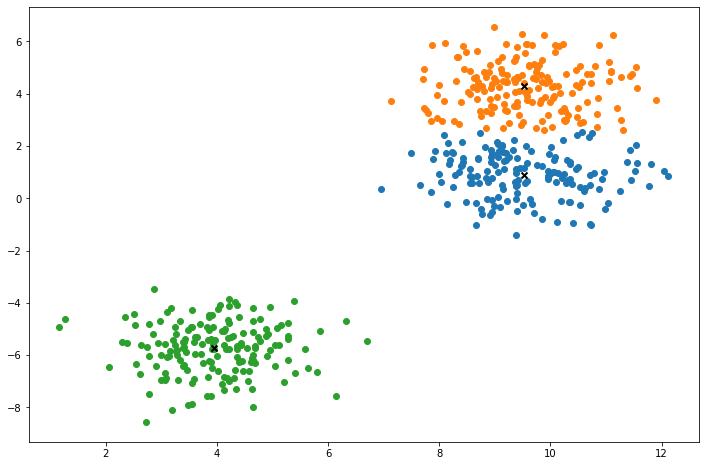

In [56]:
np.random.seed(42)

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=4)

def euclidean_distance(x1,x2):
    
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        #list of samples endices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        #mean feature vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        #optimization
        for _ in range(self.max_iters):    
            #update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            #update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        #return cluster labels
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker='x',color='black',linewidth=2)

    plt.show()  

from sklearn.metrics import pairwise_distances
from sklearn import metrics
clusters = len(np.unique(y))
print(clusters)
km = KMeans(K= clusters, max_iters=120, plot_steps=False)
y_pred = km.predict(X)
km.plot()
print(metrics.calinski_harabasz_score(X, y_pred))

3
4169.4141854648005


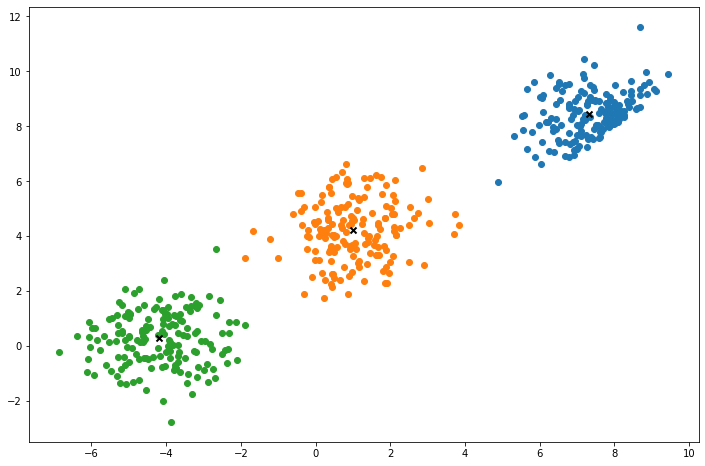

In [55]:
np.random.seed(3)

X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=3)

def euclidean_distance(x1,x2):
    
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        #list of samples endices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        #mean feature vector for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = np.sort(X, axis = 1)
        self.n_samples, self.n_features = X.shape


        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        #optimization
        for _ in range(self.max_iters):    
            #update clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            #update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)


            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        #return cluster labels
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker='x',color='black',linewidth=2)

    plt.show()  
from sklearn.metrics import pairwise_distances
from sklearn import metrics
clusters = len(np.unique(y))
print(clusters)
km = KMeans(K= clusters, max_iters=120, plot_steps=False)
y_pred = km.predict(X)
km.plot()
print(metrics.calinski_harabasz_score(X, y_pred))

In [52]:
y_pred

array([2., 1., 2., 1., 2., 0., 2., 2., 2., 2., 1., 2., 2., 0., 2., 2., 2.,
       2., 0., 0., 1., 1., 2., 2., 0., 2., 0., 1., 0., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 0., 0., 0., 0., 0., 2., 1., 1., 1., 0., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 2., 0., 2., 1., 0., 0., 0.,
       1., 0., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 0., 1., 2., 0.,
       1., 1., 1., 2., 1., 0., 2., 2., 0., 2., 1., 0., 1., 1., 2., 2., 2.,
       1., 1., 2., 2., 0., 2., 2., 1., 1., 2., 1., 0., 0., 0., 0., 0., 1.,
       2., 0., 0., 0., 0., 2., 0., 0., 0., 1., 2., 0., 2., 2., 2., 0., 1.,
       0., 0., 1., 0., 2., 0., 2., 0., 2., 0., 1., 0., 2., 1., 2., 0., 1.,
       1., 0., 2., 2., 1., 2., 0., 1., 2., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 2., 1., 0., 2., 2., 0., 1., 0., 2., 1., 0., 1., 2., 1.,
       1., 0., 2., 0., 1., 2., 0., 2., 0., 2., 1., 1., 2., 0., 0., 0., 0.,
       2., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 2., 1., 0., 1., 0.,
       1., 0., 1., 1., 2.

In [57]:
4169 - 3481

688